C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\HP\AppData\Local\Temp\ipykernel_20248\3270436485.py:18: RuntimeWarning: invalid value encountered in divide
  producer_accuracy = np.round(np.diag(cm) / np.sum(cm, axis=0), 2)


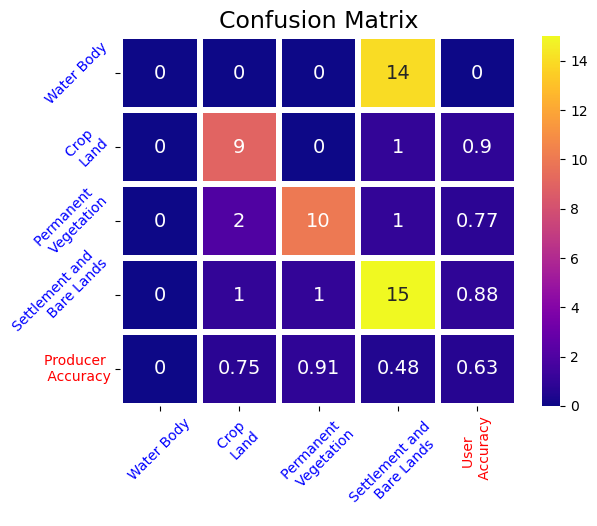

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')
df = pd.read_excel(r"D:\ggg\Cost Benefit Analysis\New folder (2)\ddd.xlsx")
actual = df.iloc[1:62, 1].to_numpy().reshape(-1, 1)
predicted = df.iloc[1:62, 2].to_numpy().reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(actual, predicted, test_size=0.90)
clf = RandomForestClassifier(random_state=23)
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
producer_accuracy = np.round(np.diag(cm) / np.sum(cm, axis=0), 2)
producer_accuracy[np.isnan(producer_accuracy)] = 0
user_accuracy = np.round(np.diag(cm) / np.sum(cm, axis=1), 2)
user_accuracy = np.append(user_accuracy, np.round(np.sum(np.diag(cm)) / np.sum(cm), 2))
result = np.vstack((cm, producer_accuracy))
result1 = np.column_stack((result, user_accuracy))
fig, ax = plt.subplots()
sns.heatmap(result1, cmap='plasma', linewidths=4, linecolor="white", annot=True, annot_kws={"size": 14}, ax=ax)
plt.title('Confusion Matrix', fontsize=17, color='black')
ax.xaxis.set_ticklabels(['Water Body', 'Crop \nLand', 'Permanent \n Vegetation', 'Settlement and \n Bare Lands', 'User \n Accuracy'], ha='center', color='blue', va='top', rotation=45)
ax.get_xticklabels()[4].set_color("red")
ax.get_xticklabels()[4].set_rotation(90)
ax.yaxis.set_ticklabels(['Water Body', 'Crop \nLand', 'Permanent \n Vegetation', 'Settlement and \n Bare Lands', 'Producer \n Accuracy'], ha='right', color='blue', va='center', rotation=45)
ax.get_yticklabels()[4].set_color("red")
ax.get_yticklabels()[4].set_rotation(0)
#plt.savefig(r'D:\New folder (2)\Confusion Matrix.jpg', dpi=2000,bbox_inches='tight')
plt.show()
